In [41]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer, PointGroupAnalyzer
from pymatgen.util.coord import pbc_shortest_vectors
from pymatgen.util.num import abs_cap
from pymatgen.util.typing import Vector3Like
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.core.lattice import Lattice
from pymatgen.core.sites import Site
from pymatgen.core.structure import IMolecule
from IPython.display import Image
from pymatgen.core.operations import SymmOp
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pymatgen.symmetry.analyzer as span

with MPRester("eKJMKclFzVrDeK1fBnBn") as m:

    # Structure du matériau
    structure = m.get_structure_by_material_id("mp-9082")    
    convstructure = SpacegroupAnalyzer(structure).get_conventional_standard_structure()
    analyzer = SpacegroupAnalyzer(convstructure)
    symmetrylist = analyzer.get_symmetry_operations() #Création d'un objet SymmOp

In [17]:
print("Le groupe de symmétrie du matériau est le suivant:",analyzer.get_space_group_symbol())
print("Les opérations de symmétrie que nous effecturons seront imagées grâce au site Jmol.")
print("L'ensemble des opérations de symmétrie sont contenue dans symmetrylist, l'objet SymmOp.")

Le groupe de symmétrie du matériau est le suivant: R-3m
Les opérations de symmétrie que nous effecturons seront imagées grâce au site Jmol.
L'ensemble des opérations de symmétrie sont contenue dans symmetrylist, l'objet SymmOp.


On étudie une symétrie de translation sur l'atome de Césium situé en [0,0,0]:

 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] [0,0,0] + [0.33333333 0.66666667 0.66666667] = [0.33333333 0.66666667 0.66666667]

 Sur l'image, on voit que la position finale est [1/3,-1/3,-1/3] ce qui correspond aux mêmes coordonées réduites après translations par les vecteurs de base b et c.


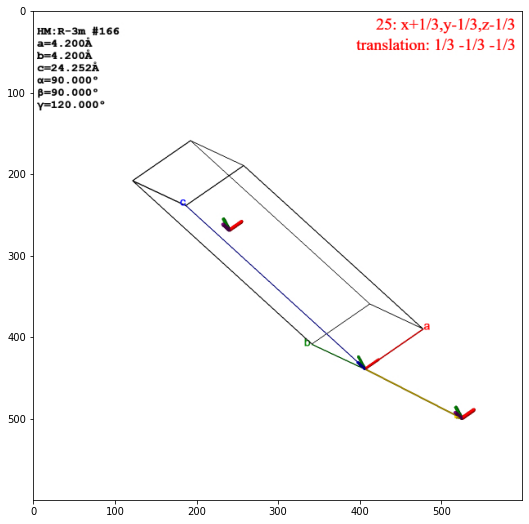

In [40]:
#Première opération de symmétrie: Translation
Translation = symmetrylist[24]
print("On étudie une symétrie de translation sur l'atome de Césium situé en [0,0,0]:")
print('\n',Translation.rotation_matrix,"[0,0,0]","+",Translation.translation_vector,"=",Translation.operate([0,0,0]))
print("\n Sur l'image, on voit que la position finale est [1/3,-1/3,-1/3] ce qui correspond aux mêmes coordonées réduites après translations par les vecteurs de base b et c.")
plt.figure(figsize = (9,9))
plt.imshow(mpimg.imread('translation.jpg'))
plt.show()

On étudie une symétrie ponctuelle miroir sur l'atome de Souffre situé en [2/3,1/3,0.561546]:

 [[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]] [2/3,1/3,0.561546] + [0. 0. 0.] = [-0.33333333 -0.66666667  0.561546  ]

 En translatant par les vecteurs de base a et b, on obtient les coordonées réduites [2/3,1/3,0.561546]


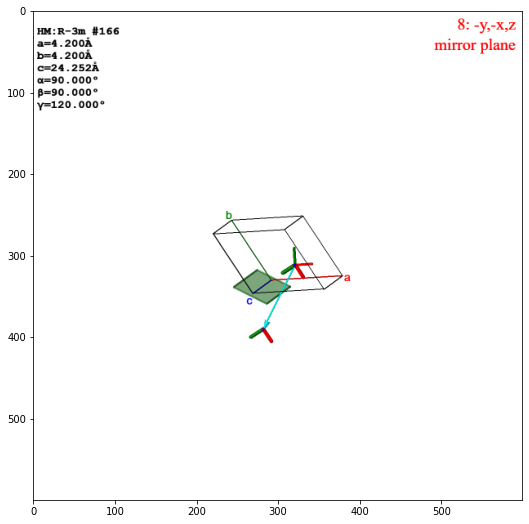

In [39]:
#Deuxième opération de symmétrie: Plan mirrroir
Mirror = symmetrylist[7]
print("On étudie une symétrie ponctuelle miroir sur l'atome de Souffre situé en [2/3,1/3,0.561546]:")
print('\n',Mirror.rotation_matrix,"[2/3,1/3,0.561546]","+",Mirror.translation_vector,"=",Mirror.operate([2/3,1/3,0.561546]))
print("\n En translatant par les vecteurs de base a et b, on obtient les coordonées réduites [2/3,1/3,0.561546]")
plt.figure(figsize = (9,9))
plt.imshow(mpimg.imread('mirror.jpg'))
plt.show()

On étudie une symétrie spatiale qui est la réflexion avec glissement sur l'atome de samarium situé en [1/3,2/3,1/6]:

 [[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]] [1/3,2/3,1/6] + [0.66666667 0.33333333 0.33333333] = [0.  0.  0.5]

 En translatant par le vecteur de base a, on trouve les coordonées réduites [0,0,1/2] qui est bien la position de l'atome de Samarium indiqué sur l'image.


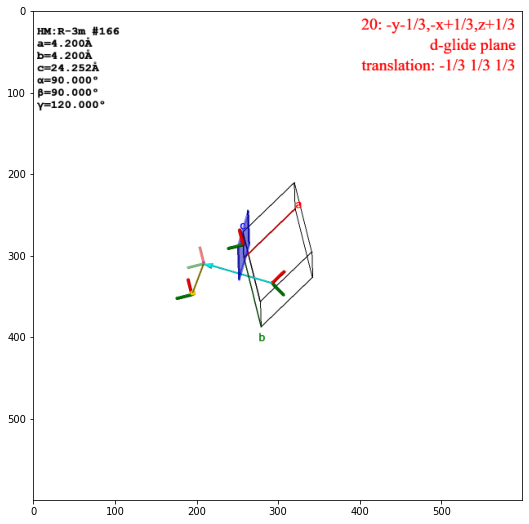

In [38]:
#3e symétrie (spatiale) sur l'atome de Sm situé en [1/3,2/3,1/6]
dglide = symmetrylist[19]
print("On étudie une symétrie spatiale qui est la réflexion avec glissement sur l'atome de samarium situé en [1/3,2/3,1/6]:")
print('\n',dglide.rotation_matrix,"[1/3,2/3,1/6]","+",dglide.translation_vector,"=",dglide.operate([1/3,2/3,1/6]))
print("\n En translatant par le vecteur de base a, on trouve les coordonées réduites [0,0,1/2] qui est bien la position de l'atome de Samarium indiqué sur l'image.")
plt.figure(figsize = (9,9))
plt.imshow(mpimg.imread('dglide.jpg'))
plt.show()